In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [146]:
data=pd.read_csv('demo/data/data1.csv')

In [4]:
#1994-2013年的数据，13个变量分别是：社会从业人数 x1、在岗职工工资总额 x2、社会消费品零售总额 x3、城镇居民人均可支配收入 x4、城镇居民人均消费性支出 x5、
#年末总人口 x6、社会固定资产投资额 x7、地区生产总值 x8、第一产业产值 x9、税收 x10、居民消费价格指数 x11、第三产业与第二产业产值比 x12、居民消费水平 x13
len(data)

20

In [25]:
#======生成变量的多项式练习=======
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(2)
pd.DataFrame(poly.fit_transform(data))#生成每个变量的0、1、2次方

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,1.0,3831732.0,181.54,448.19,7571.00,6212.70,6370241.0,525.71,985.31,60.62,...,14400.00,123.4800,638520.0,7784.400,1.058841,5475.309,66.75123,2.831304e+07,345173.27,4.208117e+03
1,1.0,3913824.0,214.63,549.97,9038.16,7601.73,6467115.0,618.25,1259.20,73.46,...,12882.25,119.2885,741041.5,11321.625,1.104601,6861.979,104.83725,4.262784e+07,651267.75,9.950062e+03
2,1.0,3928907.0,239.56,686.44,9905.31,8092.82,6560508.0,638.94,1468.06,81.16,...,11707.24,115.1248,758265.6,9533.502,1.132096,7456.512,93.74904,4.911206e+07,617474.88,7.763372e+03
3,1.0,4282130.0,261.58,802.59,10444.60,8767.98,6664862.0,656.58,1678.12,85.72,...,10444.84,111.6024,786326.8,10840.354,1.192464,8401.848,115.82844,5.919764e+07,816102.58,1.125084e+04
4,1.0,4453911.0,283.14,904.57,11255.70,9422.33,6741400.0,758.83,1893.52,88.88,...,9545.29,117.2400,784237.9,13416.164,1.440000,9632.400,164.78400,6.443273e+07,1102267.64,1.885678e+04
5,1.0,4548852.0,308.58,1000.69,12018.52,9751.44,6850024.0,878.26,2139.18,92.85,...,9702.25,118.0030,842076.5,18531.790,1.435204,10241.702,225.39172,7.308540e+07,1608408.86,3.539666e+04
6,1.0,4962579.0,348.09,1121.13,13966.53,11349.47,7006896.0,923.67,2492.74,94.37,...,10567.84,138.5744,983384.8,22606.748,1.817104,12894.968,296.43868,9.150836e+07,2103659.06,4.836041e+04
7,1.0,5029338.0,387.81,1248.29,14694.00,11467.35,7125979.0,978.21,2841.65,97.28,...,9781.21,145.0863,1035779.7,26891.899,2.152089,15363.891,398.89197,1.096837e+08,2847713.43,7.393505e+04
8,1.0,5070216.0,453.49,1370.68,13380.47,10671.78,7206229.0,1009.24,3203.96,103.07,...,9525.76,152.2560,1119374.4,26264.160,2.433600,17891.640,419.79600,1.315380e+08,3086307.90,7.241481e+04
9,1.0,5210706.0,533.55,1494.27,15002.59,11570.58,7251888.0,1175.17,3758.62,109.91,...,10020.01,145.7456,1237236.0,30085.055,2.119936,17996.160,437.60080,1.527696e+08,3714798.00,9.033030e+04


In [7]:
#=============数据探索=============
data_explore=data.describe().T
data_explore

,count,mean,std,min,25%,50%,75%,max
x1,20.0,5.579520e+06,1.262195e+06,3831732.000,4.525117e+06,5308896.500,6.594658e+06,7599295.000
x2,20.0,7.650350e+02,5.956983e+02,181.540,3.022200e+02,565.940,1.033535e+03,2110.780
x3,20.0,2.370825e+03,1.919167e+03,448.190,9.766600e+02,1586.020,3.294485e+03,6882.850
x4,20.0,1.964469e+04,1.020302e+04,7571.000,1.182781e+04,15943.375,2.588994e+04,42049.140
x5,20.0,1.587095e+04,8.199771e+03,6212.700,9.669163e+03,12345.705,2.133219e+04,33156.830
x6,20.0,7.350514e+06,6.213419e+05,6370241.000,6.822868e+06,7314304.000,7.867810e+06,8323096.000
x7,20.0,1.712239e+03,1.184714e+03,525.710,8.484025e+02,1262.050,2.244117e+03,4454.550
x8,20.0,5.705799e+03,4.478400e+03,985.310,2.077765e+03,4104.585,8.500087e+03,15420.140
x9,20.0,1.294935e+02,5.050983e+01,60.620,9.185750e+01,113.530,1.699625e+02,228.460
x10,20.0,3.402165e+02,2.515779e+02,65.660,1.432375e+02,235.760,5.210650e+02,852.560


In [20]:
#======数据离散化处理练习============
cut_rule=pd.cut(data['x2'],bins=[0,500,1000,1500,2000,2500])#指定分割点，左右端点必须包含数据取值范围
data_cut_2=pd.get_dummies(cut_rule)
data_cut_2.head()

,"(0, 500]","(500, 1000]","(1000, 1500]","(1500, 2000]","(2000, 2500]"
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [17]:
#======数据归一化情况练习======
from sklearn import preprocessing
#标准化
explore=preprocessing.scale(data)
data_explore=pd.DataFrame(explore,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','y'])
data_explore.head()
#归一化
minmax_scaler=preprocessing.MinMaxScaler()
explore1=minmax_scaler.fit_transform(data)
data_explore1=pd.DataFrame(explore1,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','y'])
data_explore1.head()
#零中性化
data_explore2=data-data.mean(axis=0)#指定计算列的平均值，没有参数则计算所有数据的均值
data_explore2.head()
#规范化：范数
explore3=preprocessing.normalize(data,norm='l2')#2范数
data_explore3=pd.DataFrame(explore3,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','y'])
data_explore3.head()
#二值化:大于零的数值为1，小于零为0
explore4=preprocessing.Binarizer().fit(data)
explore4.transform(data)

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1

In [9]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,3831732,181.54,448.19,7571.00,6212.70,6370241,525.71,985.31,60.62,65.66,120.0,1.029,5321,64.87
1,3913824,214.63,549.97,9038.16,7601.73,6467115,618.25,1259.20,73.46,95.46,113.5,1.051,6529,99.75
2,3928907,239.56,686.44,9905.31,8092.82,6560508,638.94,1468.06,81.16,81.16,108.2,1.064,7008,88.11
3,4282130,261.58,802.59,10444.60,8767.98,6664862,656.58,1678.12,85.72,91.70,102.2,1.092,7694,106.07
4,4453911,283.14,904.57,11255.70,9422.33,6741400,758.83,1893.52,88.88,114.61,97.7,1.200,8027,137.32


# 特征选择

In [8]:
#========特征选择之filtter（单变量）=======
#1、方差阈值筛选法
#优点：可以去掉几近常量的变量；
#缺点：第一，阈值的自我设定缺乏依据，尤其当所有变量的方差无明显差异时；第二，返回数组，转化为df后，原来列名丢失，需要与原数据对比
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=(.8*(1-.8)))#设置方差阈值
pd.DataFrame(sel.fit_transform(data.iloc[:,0:13]))#x12和x13因为方差变化太小被舍弃

,0,1,2,3,4,5,6,7,8,9,10,11
0,3831732.0,181.54,448.19,7571.00,6212.70,6370241.0,525.71,985.31,60.62,65.66,120.0,5321.0
1,3913824.0,214.63,549.97,9038.16,7601.73,6467115.0,618.25,1259.20,73.46,95.46,113.5,6529.0
2,3928907.0,239.56,686.44,9905.31,8092.82,6560508.0,638.94,1468.06,81.16,81.16,108.2,7008.0
3,4282130.0,261.58,802.59,10444.60,8767.98,6664862.0,656.58,1678.12,85.72,91.70,102.2,7694.0
4,4453911.0,283.14,904.57,11255.70,9422.33,6741400.0,758.83,1893.52,88.88,114.61,97.7,8027.0
5,4548852.0,308.58,1000.69,12018.52,9751.44,6850024.0,878.26,2139.18,92.85,152.78,98.5,8549.0
6,4962579.0,348.09,1121.13,13966.53,11349.47,7006896.0,923.67,2492.74,94.37,170.62,102.8,9566.0
7,5029338.0,387.81,1248.29,14694.00,11467.35,7125979.0,978.21,2841.65,97.28,214.53,98.9,10473.0
8,5070216.0,453.49,1370.68,13380.47,10671.78,7206229.0,1009.24,3203.96,103.07,202.18,97.6,11469.0
9,5210706.0,533.55,1494.27,15002.59,11570.58,7251888.0,1175.17,3758.62,109.91,222.51,100.1,12360.0


In [8]:
#2、统计指标
#相关分析：皮尔逊（数值型变量 vs 数值型变量）
np.round(data.corr(method='pearson'),2)#x11与y的相关性较小

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
x1,1.00,0.95,0.95,0.97,0.97,0.99,0.95,0.97,0.98,0.98,-0.29,0.94,0.96,0.94
x2,0.95,1.00,1.00,0.99,0.99,0.92,0.99,0.99,0.98,0.98,-0.13,0.89,1.00,0.98
x3,0.95,1.00,1.00,0.99,0.99,0.92,1.00,0.99,0.98,0.99,-0.15,0.89,1.00,0.99
x4,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.19,0.91,1.00,0.99
x5,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.18,0.90,0.99,0.99
x6,0.99,0.92,0.92,0.95,0.95,1.00,0.93,0.95,0.97,0.96,-0.34,0.95,0.94,0.91
x7,0.95,0.99,1.00,0.99,0.99,0.93,1.00,0.99,0.98,0.99,-0.15,0.89,1.00,0.99
x8,0.97,0.99,0.99,1.00,1.00,0.95,0.99,1.00,0.99,1.00,-0.15,0.90,1.00,0.99
x9,0.98,0.98,0.98,0.99,0.99,0.97,0.98,0.99,1.00,0.99,-0.23,0.91,0.99,0.98
x10,0.98,0.98,0.99,1.00,1.00,0.96,0.99,1.00,0.99,1.00,-0.17,0.90,0.99,0.99


In [31]:
def dcor(X, Y):
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    return dcor

In [33]:
#距离相关系数:计算非线性相关系数
from scipy.spatial.distance import pdist, squareform
x=np.random.uniform(-1,1,1000)
dcor(x,x**2)

0.4935820557964785

In [11]:
#卡方检验（定性变量 vs 定性变量）
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
iris=load_iris()#鸢尾花的例子不恰当，因为自变量都是数值型的
X,y=iris.data,iris.target

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
X[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [18]:
X_sel=SelectKBest(chi2,k=2).fit_transform(X,y)

In [22]:
X_sel[0:5]#根据自变量与因变量的相关性，删除了第一和第二个变量

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

In [36]:
#=============特征选择之wrapper法（递归选择：前向法、后向法、逐步回归法）=======
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
RFE(estimator=LogisticRegression(),n_features_to_select=2).fit_transform(iris.data,iris.target)#后向法

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2],
       [3.9, 0.4],
       [3.4, 0.3],
       [3.4, 0.2],
       [2.9, 0.2],
       [3.1, 0.1],
       [3.7, 0.2],
       [3.4, 0.2],
       [3. , 0.1],
       [3. , 0.1],
       [4. , 0.2],
       [4.4, 0.4],
       [3.9, 0.4],
       [3.5, 0.3],
       [3.8, 0.3],
       [3.8, 0.3],
       [3.4, 0.2],
       [3.7, 0.4],
       [3.6, 0.2],
       [3.3, 0.5],
       [3.4, 0.2],
       [3. , 0.2],
       [3.4, 0.4],
       [3.5, 0.2],
       [3.4, 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.4, 0.4],
       [4.1, 0.1],
       [4.2, 0.2],
       [3.1, 0.1],
       [3.2, 0.2],
       [3.5, 0.2],
       [3.1, 0.1],
       [3. , 0.2],
       [3.4, 0.2],
       [3.5, 0.3],
       [2.3, 0.3],
       [3.2, 0.2],
       [3.5, 0.6],
       [3.8, 0.4],
       [3. , 0.3],
       [3.8, 0.2],
       [3.2, 0.2],
       [3.7, 0.2],
       [3.3, 0.2],
       [3.2, 1.4],
       [3.2, 1.5],
       [3.1,

In [35]:
?RFE

# 特征选择之Embeded（正则化）

In [ ]:
#利用lasso筛选变量========
def lasso_regression(data,alpha,subplot):
    lasso_reg=Lasso(alpha=alpha,normalize=True)
    lasso_reg.fit(data.iloc[:,0:13],data['y'])
    y_pred=lasso_reg.predict(data.iloc[:,0:13])
    error=sum(np.power(data['y']-y_pred,2))
    
    plt.subplot(subplot)
    plt.tight_layout()
    plt.plot(data['y'],data['y'])
    plt.plot(data['y'],y_pred,'.')
    plt.title('error is %g' %error)
    
    return lasso_reg.coef_

E:\Software\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


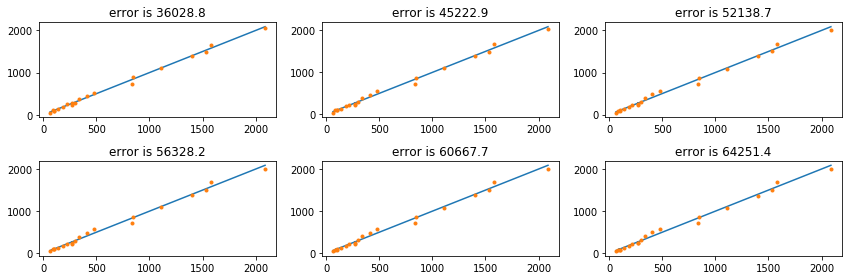

In [152]:
alpha_redge=[0.1,0.2,0.3,0.4,0.5,0.6]
subplots=[231,232,233,234,235,236]
coef_metrix=[]
plt.figure(figsize=(12,4))
for i in range(0,len(alpha_redge)):
    coef_metrix.append(lasso_regression(data,alpha_redge[i],subplots[i]))
#随着alpha惩罚项的增大，模型欠拟合程度增加，如何在过拟合与欠拟合之间选择合适的alpha值，还需进行交叉验证，但限于本研究数据量较少故不再展开

In [153]:
#13个变量分别是：社会从业人数 x1、在岗职工工资总额 x2、社会消费品零售总额 x3、城镇居民人均可支配收入 x4、城镇居民人均消费性支出 x5、
#年末总人口 x6、社会固定资产投资额 x7、地区生产总值 x8、第一产业产值 x9、税收 x10、居民消费价格指数 x11、第三产业与第二产业产值比 x12、居民消费水平 x13

pd.DataFrame(coef_metrix)
#被删除的变量是：社会从业人数 x1、在岗职工工资总额 x2、城镇居民人均可支配收入 x4、年末总人口 x6、地区生产总值 x8、第一产业产值 x9、税收 x10、
#第三产业与第二产业产值比 x12、居民消费水平 x13
#稳定后剩余变量是：社会消费品零售总额 x3、城镇居民人均消费性支出 x5、年末总人口 x6、社会固定资产投资额 x7、税收 x10、居民消费价格指数 x11


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.000128,-0.424889,0.159887,-0.0,0.043528,0.000000,0.280929,0.013153,0.0,0.342199,3.341310,111.397993,-0.013403
1,-0.000117,-0.093719,0.000707,-0.0,0.036454,-0.000024,0.321905,0.000000,0.0,0.523907,1.447206,28.347732,-0.000000
2,-0.000044,-0.000000,0.000000,0.0,0.022373,-0.000095,0.333285,0.000000,0.0,0.546536,0.898793,0.000000,-0.000000
3,-0.000000,0.000000,0.000225,0.0,0.023192,-0.000121,0.351248,0.000000,0.0,0.278905,1.469727,0.000000,0.000000
4,-0.000000,0.000000,0.016955,0.0,0.022891,-0.000071,0.351702,0.000000,0.0,0.044923,2.289755,-0.000000,0.000000
5,-0.000000,0.000000,0.037526,0.0,0.019206,-0.000038,0.337091,0.000000,0.0,0.000000,2.720484,-0.000000,0.000000


OLS的问题，在变量选择方面有三种扩展的方法： 
（1）子集选择 这是传统的方法，包括逐步回归和最优子集法等，对可能的部分子集拟合线性模型，利用判别准则 （如AIC,BIC,Cp,调整R2 等）决定最优的模型。 
（2）收缩方法（shrinkage method） 收缩方法又称为正则化（regularization）。主要是岭回归（ridge regression）和lasso回归。
通过对最小二乘估计加入罚约束，使某些系数的估计为0。 
(3)维数缩减 主成分回归（PCR）和偏最小二乘回归（PLS）的方法。把p个预测变量投影到m维空间

# 灰色预测自变量

In [74]:
#==========GM11模型：得出自变量的预测值==========

def GM11(x0): #自定义灰色预测函数
    x1 = np.cumsum(x0) #1-AGO序列
    z1 = (x1[:len(x1)-1] + x1[1:])/2.0 #紧邻均值（MEAN）生成序列（Z是X1相邻两数的加权平均，这里权重设置为0.5）
    z1 = z1.reshape((len(z1),1))
    B = np.append(-z1, np.ones_like(z1), axis = 1)
    Yn = x0[1:].reshape((len(x0)-1, 1))
    neiji=np.dot(B.T, B)
    qiuni=np.linalg.inv(neiji)
    [[a],[b]] = np.dot(np.dot(qiuni,B.T),Yn) #计算参数 u=(BTB)−1BTY
    f = lambda k: (x0[0]-b/a)*np.exp(-a*(k-1))-(x0[0]-b/a)*np.exp(-a*(k-2)) #还原值
    delta = np.abs(x0 - np.array([f(i) for i in range(1,len(x0)+1)]))
    C = delta.std()/x0.std()
    P = 1.0*(np.abs(delta - delta.mean()) < 0.6745*x0.std()).sum()/len(x0)
    return f, a, b, x0[0], C, P #返回灰色预测函数、a、b、首项、方差比、小残差概率

In [71]:
a=[1,2,3,4,5,6,7]
np.cumsum(a)

array([ 1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [154]:
#通过1994-2013的数据预测
data.index=range(1994,2014)
data.loc[2014]=None
data.loc[2015]=None
l=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13']
for i in l:
    f=GM11(data.loc[1994:2013,i].as_matrix())[0]
    data[i][2014]=f(len(data)-1)
    data[i][2015]=f(len(data))
    data[i]=data[i].round(2)
    

[3.83173200e+06 7.74555600e+06 1.16744630e+07 1.59565930e+07
 2.04105040e+07 2.49593560e+07 2.99219350e+07 3.49512730e+07
 4.00214890e+07 4.52321950e+07 5.06392820e+07 5.63838320e+07
 6.23788050e+07 6.86151170e+07 7.51441620e+07 8.19356570e+07
 8.90463520e+07 9.64781070e+07 1.03991104e+08 1.11590399e+08]
[  181.54   396.17   635.73   897.31  1180.45  1489.03  1837.12  2224.93
  2678.42  3211.97  3810.3   4475.62  5214.59  6091.66  7097.03  8215.06
  9519.54 11220.41 13189.92 15300.7 ]
[  448.19   998.16  1684.6   2487.19  3391.76  4392.45  5513.58  6761.87
  8132.55  9626.82 11304.59 13210.43 15409.57 18033.81 21221.2  24836.97
 29313.35 34556.38 40533.65 47416.5 ]
[  7571.    16609.16  26514.47  36959.07  48214.77  60233.29  74199.82
  88893.82 102274.29 117276.88 134161.04 152448.28 172298.94 194768.16
 220084.88 247694.47 278352.96 312791.04 350844.56 392893.7 ]
[  6212.7   13814.43  21907.25  30675.23  40097.56  49849.    61198.47
  72665.82  83337.6   94908.18 108029.01 122497.25 

In [155]:
data.tail()#返回自变量预测值

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
2011,7431755.00,1700.87,5243.03,34438.08,28209.74,8145797.00,3412.21,12423.44,204.54,710.66,105.50,1.67,34214.00,1535.14
2012,7512997.00,1969.51,5977.27,38053.52,30490.44,8222969.00,3758.39,13551.21,213.76,760.49,103.00,1.82,37934.00,1579.68
2013,7599295.00,2110.78,6882.85,42049.14,33156.83,8323096.00,4454.55,15420.14,228.46,852.56,102.60,1.91,41972.00,2088.14
2014,8142148.24,2239.29,7042.31,43611.84,35046.63,8505522.58,4600.40,18686.28,241.27,1052.28,101.50,1.89,44506.47,NaN
2015,8460489.28,2581.14,8166.92,47792.22,38384.22,8627139.31,5214.78,21474.47,257.95,1197.04,101.41,1.94,49945.88,NaN


# lasso回归预测y

In [165]:
lasso_reg=Lasso(alpha=1e-10,normalize=True)#选择模型误差较稳定的alpha参数
lasso_reg.fit(data.loc[1994:2013,['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13']],data.loc[1994:2013,'y'])
data['lasso_y_pred']=lasso_reg.predict(data.iloc[:,0:13])

E:\Software\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


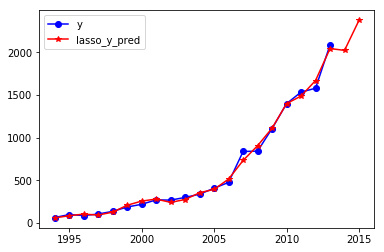

In [166]:
data[['y','lasso_y_pred']].plot(style=['b-o','r-*'])
plt.show()#可以看出模型拟合效果较好，除了突变点外，不过这儿也反映了lasso对过拟合的处理

# 神经网络预测y

In [168]:
#整体的思路是：
#1、用1994到2013年的标准化数据进行模型训练
#2、将训练好的数据作用于1994-2015年标准化的数据（注意：预测之后需要将y_predict还原为未标准化的形式）
#疑问：为什么还原y_pred时要采用训练集的的mean和std？解答：这里假设训练集的y与整体数据y的分布一致

#feature = ['x1', 'x2', 'x3', 'x4', 'x5', 'x7'] #书的结果特征所在列
feature = ['x3', 'x5', 'x6', 'x7', 'x10', 'x11'] #自己利用lasso特征选择得到的变量

data_train = data.loc[range(1994,2014)].copy() #取2014年前的数据建模
data_mean = data_train.mean()
data_std = data_train.std()
data_train = (data_train - data_mean)/data_std #数据标准化
x_train = data_train[feature].as_matrix() #特征数据
y_train = data_train['y'].as_matrix() #标签数据

from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential() 
model.add(Dense(12,input_dim=6,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,nb_epoch=10000,batch_size=16)#训练一万次

#预测，并还原结果。
x = ((data[feature] - data_mean[feature])/data_std[feature]).as_matrix()
data['net_y_pred'] = model.predict(x) * data_std['y'] + data_mean['y']

E:\Software\anaconda\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10000
20/20 [==============================] - 1s 59ms/step - loss: 1.1365
Epoch 2/10000
20/20 [==============================] - 0s 950us/step - loss: 1.0899
Epoch 3/10000
20/20 [==============================] - 0s 850us/step - loss: 1.0430
Epoch 4/10000
20/20 [==============================] - 0s 1ms/step - loss: 1.0022
Epoch 5/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.9589
Epoch 6/10000
20/20 [==============================] - 0s 850us/step - loss: 0.9170
Epoch 7/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.8764
Epoch 8/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.8362
Epoch 9/10000
20/20 [==============================] - 0s 700us/step - loss: 0.7959
Epoch 10/10000
20/20 [==============================] - 0s 600us/step - loss: 0.7582
Epoch 11/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.7211
Epoch 12/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.6872
Ep

20/20 [==============================] - 0s 400us/step - loss: 0.0107
Epoch 193/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0106
Epoch 194/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0106
Epoch 195/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0105
Epoch 196/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0105
Epoch 197/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0105
Epoch 198/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0105
Epoch 199/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0105
Epoch 200/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0105
Epoch 201/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0104
Epoch 202/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0104
Epoch 203/10000
20/20 [==============================] - 0s 350us/step

20/20 [==============================] - 0s 300us/step - loss: 0.0080
Epoch 383/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0080
Epoch 384/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0080
Epoch 385/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0079
Epoch 386/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0079
Epoch 387/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0079
Epoch 388/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0079
Epoch 389/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0079
Epoch 390/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0079
Epoch 391/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0079
Epoch 392/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0079
Epoch 393/10000
20/20 [==============================] - 0s 300us/step

20/20 [==============================] - 0s 300us/step - loss: 0.0065
Epoch 573/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0066
Epoch 574/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0066
Epoch 575/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0066
Epoch 576/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0068
Epoch 577/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0067
Epoch 578/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0067
Epoch 579/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0067
Epoch 580/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0067
Epoch 581/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0067
Epoch 582/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0067
Epoch 583/10000
20/20 [==============================] - 0s 300us/step

20/20 [==============================] - 0s 350us/step - loss: 0.0061
Epoch 763/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0061
Epoch 764/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0060
Epoch 765/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0060
Epoch 766/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0059
Epoch 767/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0059
Epoch 768/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0059
Epoch 769/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0060
Epoch 770/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0060
Epoch 771/10000
20/20 [==============================] - 0s 900us/step - loss: 0.0060
Epoch 772/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0060
Epoch 773/10000
20/20 [==============================] - 0s 300us/step

20/20 [==============================] - 0s 700us/step - loss: 0.0056
Epoch 953/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0057
Epoch 954/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0055
Epoch 955/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0054
Epoch 956/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0054
Epoch 957/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0054
Epoch 958/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0054
Epoch 959/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0055
Epoch 960/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0057
Epoch 961/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0056
Epoch 962/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0055
Epoch 963/10000
20/20 [==============================] - 0s 300us/step

Epoch 1047/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0052
Epoch 1048/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0052
Epoch 1049/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0052
Epoch 1050/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0052
Epoch 1051/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0052
Epoch 1052/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0052
Epoch 1053/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0052
Epoch 1054/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0053
Epoch 1055/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0055
Epoch 1056/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0054
Epoch 1057/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0054
Epoch 1058/10000
20/20 [===================

20/20 [==============================] - 0s 350us/step - loss: 0.0054
Epoch 1142/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0053
Epoch 1143/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0052
Epoch 1144/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0052
Epoch 1145/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0050
Epoch 1146/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0050
Epoch 1147/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0049
Epoch 1148/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0049
Epoch 1149/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0050
Epoch 1150/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0050
Epoch 1151/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0050
Epoch 1152/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 650us/step - loss: 0.0047
Epoch 1328/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0046
Epoch 1329/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0045
Epoch 1330/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0045
Epoch 1331/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0047
Epoch 1332/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0046
Epoch 1333/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0046
Epoch 1334/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0047
Epoch 1335/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0046
Epoch 1336/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0046
Epoch 1337/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0046
Epoch 1338/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0041
Epoch 1516/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0041
Epoch 1517/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0041
Epoch 1518/10000
20/20 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 1519/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0043
Epoch 1520/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0044
Epoch 1521/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0044
Epoch 1522/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0043
Epoch 1523/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0043
Epoch 1524/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0042
Epoch 1525/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0043
Epoch 1526/10000
20/20 [==============================] - 0s 2

20/20 [==============================] - 0s 350us/step - loss: 0.0037
Epoch 1704/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0037
Epoch 1705/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0037
Epoch 1706/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0038
Epoch 1707/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0038
Epoch 1708/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0038
Epoch 1709/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0038
Epoch 1710/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0037
Epoch 1711/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0037
Epoch 1712/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0036
Epoch 1713/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0036
Epoch 1714/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0035
Epoch 1798/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0035
Epoch 1799/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0035
Epoch 1800/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0035
Epoch 1801/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0035
Epoch 1802/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0035
Epoch 1803/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0035
Epoch 1804/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0036
Epoch 1805/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0035
Epoch 1806/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0035
Epoch 1807/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0035
Epoch 1808/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0032
Epoch 1986/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0032
Epoch 1987/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0032
Epoch 1988/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0033
Epoch 1989/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0033
Epoch 1990/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0033
Epoch 1991/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0033
Epoch 1992/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0032
Epoch 1993/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0032
Epoch 1994/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0032
Epoch 1995/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0032
Epoch 1996/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 400us/step - loss: 0.0030
Epoch 2174/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0030
Epoch 2175/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0029
Epoch 2176/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0029
Epoch 2177/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0029
Epoch 2178/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0029
Epoch 2179/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0029
Epoch 2180/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0029
Epoch 2181/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0029
Epoch 2182/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0029
Epoch 2183/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0029
Epoch 2184/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 2268/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0031
Epoch 2269/10000
20/20 [==============================] - ETA: 0s - loss: 0.003 - 0s 350us/step - loss: 0.0032
Epoch 2270/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0032
Epoch 2271/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0031
Epoch 2272/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0029
Epoch 2273/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0028
Epoch 2274/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0028
Epoch 2275/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0028
Epoch 2276/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0028
Epoch 2277/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0028
Epoch 2278/10000
20/20 [==============

20/20 [==============================] - 0s 400us/step - loss: 0.0029
Epoch 2362/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0028
Epoch 2363/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0027
Epoch 2364/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0027
Epoch 2365/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0027
Epoch 2366/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0027
Epoch 2367/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0027
Epoch 2368/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0027
Epoch 2369/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0027
Epoch 2370/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0027
Epoch 2371/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0028
Epoch 2372/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 200us/step - loss: 0.0027
Epoch 2550/10000
20/20 [==============================] - 0s 200us/step - loss: 0.0026
Epoch 2551/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0027
Epoch 2552/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0026
Epoch 2553/10000
20/20 [==============================] - 0s 200us/step - loss: 0.0026
Epoch 2554/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0026
Epoch 2555/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0026
Epoch 2556/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0026
Epoch 2557/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0027
Epoch 2558/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0027
Epoch 2559/10000
20/20 [==============================] - 0s 200us/step - loss: 0.0027
Epoch 2560/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0025
Epoch 2738/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0025
Epoch 2739/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 2740/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0024
Epoch 2741/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0024
Epoch 2742/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0026
Epoch 2743/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0028
Epoch 2744/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0027
Epoch 2745/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0025
Epoch 2746/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 2747/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 2748/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0024
Epoch 2926/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0025
Epoch 2927/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0027
Epoch 2928/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0028
Epoch 2929/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 2930/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0026
Epoch 2931/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0025
Epoch 2932/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 2933/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0024
Epoch 2934/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0023
Epoch 2935/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0023
Epoch 2936/10000
20/20 [==============================] - 0s 3

20/20 [==============================] - 0s 350us/step - loss: 0.0026
Epoch 3114/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0025
Epoch 3115/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0025
Epoch 3116/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0024
Epoch 3117/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 3118/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0023
Epoch 3119/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0023
Epoch 3120/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0022
Epoch 3121/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 3122/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 3123/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 3124/10000
20/20 [==============================] - 0s

Epoch 3300/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0022
Epoch 3301/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 3302/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0023
Epoch 3303/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0023
Epoch 3304/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 3305/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 3306/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0022
Epoch 3307/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0022
Epoch 3308/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 3309/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0023
Epoch 3310/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 3311/10000
20/20 [===================

20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 3488/10000
20/20 [==============================] - 0s 700us/step - loss: 0.0021
Epoch 3489/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0022
Epoch 3490/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 3491/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 3492/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 3493/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0022
Epoch 3494/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0023
Epoch 3495/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 3496/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0022
Epoch 3497/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0022
Epoch 3498/10000
20/20 [==============================] - 0s

Epoch 3581/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0021
Epoch 3582/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0021
Epoch 3583/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 3584/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0021
Epoch 3585/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0020
Epoch 3586/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0021
Epoch 3587/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 3588/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0026
Epoch 3589/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 3590/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0022
Epoch 3591/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 3592/10000
20/20 [=======================

20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 3770/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 3771/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 3772/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0022
Epoch 3773/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0023
Epoch 3774/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0022
Epoch 3775/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 3776/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0020
Epoch 3777/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0021
Epoch 3778/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 3779/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 3780/10000
20/20 [==============================] - 0s 350

20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 3958/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0022
Epoch 3959/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0026
Epoch 3960/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0027
Epoch 3961/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0025
Epoch 3962/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 3963/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0019
Epoch 3964/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 3965/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 3966/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0024
Epoch 3967/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0025
Epoch 3968/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 250us/step - loss: 0.0021
Epoch 4146/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0021
Epoch 4147/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4148/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0019
Epoch 4149/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0019
Epoch 4150/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0020
Epoch 4151/10000
20/20 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 4152/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0019
Epoch 4153/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4154/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4155/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4156/10000
20/20 [==============================] - 0s 4

20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 4240/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 4241/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 4242/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0019
Epoch 4243/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 4244/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 4245/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 4246/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4247/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0019
Epoch 4248/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 4249/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4250/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 550us/step - loss: 0.0019
Epoch 4427/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4428/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 4429/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 4430/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4431/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 4432/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4433/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 4434/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0019
Epoch 4435/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 4436/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4437/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 4615/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0019
Epoch 4616/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 4617/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0018
Epoch 4618/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4619/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 4620/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0017
Epoch 4621/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0019
Epoch 4622/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 4623/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4624/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4625/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 600us/step - loss: 0.0019
Epoch 4709/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4710/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4711/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4712/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4713/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4714/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4715/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0018
Epoch 4716/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4717/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4718/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0018
Epoch 4719/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4897/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4898/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 4899/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 4900/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 4901/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 4902/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4903/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4904/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0017
Epoch 4905/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 4906/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0017
Epoch 4907/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5085/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0018
Epoch 5086/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 5087/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 5088/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 5089/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 5090/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5091/10000
20/20 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 5092/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0016
Epoch 5093/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5094/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0017
Epoch 5095/10000
20/20 [==============================] - 0s 3

20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 5179/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 5180/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 5181/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5182/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 5183/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5184/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5185/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5186/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0017
Epoch 5187/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5188/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 5189/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 400us/step - loss: 0.0016
Epoch 5366/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0016
Epoch 5367/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0016
Epoch 5368/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0017
Epoch 5369/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0017
Epoch 5370/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0016
Epoch 5371/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0016
Epoch 5372/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 5373/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 5374/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 5375/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 5376/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5458/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 5459/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5460/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5461/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0018
Epoch 5462/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0017
Epoch 5463/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5464/10000
20/20 [==============================] - ETA: 0s - loss: 0.001 - 0s 700us/step - loss: 0.0016
Epoch 5465/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0015
Epoch 5466/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0015
Epoch 5467/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0015
Epoch 5468/10000
20/20 [============

20/20 [==============================] - 0s 400us/step - loss: 0.0023
Epoch 5645/10000
20/20 [==============================] - ETA: 0s - loss: 0.002 - 0s 500us/step - loss: 0.0022
Epoch 5646/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0017
Epoch 5647/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 5648/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 5649/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0017
Epoch 5650/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0021
Epoch 5651/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0023
Epoch 5652/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0021
Epoch 5653/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 5654/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0016
Epoch 5655/10000
20/20 [============

20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 5832/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0014
Epoch 5833/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 5834/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0015
Epoch 5835/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 5836/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 5837/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 5838/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0016
Epoch 5839/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 5840/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5841/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 5842/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6019/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 6020/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 6021/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6022/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 6023/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0013
Epoch 6024/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6025/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0015
Epoch 6026/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 6027/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 6028/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0015
Epoch 6029/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 6207/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 6208/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 6209/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 6210/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 6211/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 6212/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 6213/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 6214/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 6215/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 6216/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 6217/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6395/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6396/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 6397/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6398/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6399/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6400/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6401/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0012
Epoch 6402/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6403/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0012
Epoch 6404/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6405/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6583/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6584/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6585/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0011
Epoch 6586/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0011
Epoch 6587/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0011
Epoch 6588/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0012
Epoch 6589/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6590/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0012
Epoch 6591/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0011
Epoch 6592/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0011
Epoch 6593/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0011
Epoch 6771/10000
20/20 [==============================] - 0s 350us/step - loss: 9.8326e-04
Epoch 6772/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0011
Epoch 6773/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6774/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0011
Epoch 6775/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0010
Epoch 6776/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0011
Epoch 6777/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 6778/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0014
Epoch 6779/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0014
Epoch 6780/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 6781/10000
20/20 [==============================] 

20/20 [==============================] - 0s 300us/step - loss: 9.6850e-04
Epoch 6956/10000
20/20 [==============================] - 0s 300us/step - loss: 9.4400e-04
Epoch 6957/10000
20/20 [==============================] - 0s 650us/step - loss: 9.3306e-04
Epoch 6958/10000
20/20 [==============================] - 0s 350us/step - loss: 9.4483e-04
Epoch 6959/10000
20/20 [==============================] - 0s 300us/step - loss: 9.4152e-04
Epoch 6960/10000
20/20 [==============================] - 0s 350us/step - loss: 9.2161e-04
Epoch 6961/10000
20/20 [==============================] - 0s 300us/step - loss: 9.1522e-04
Epoch 6962/10000
20/20 [==============================] - 0s 300us/step - loss: 9.4583e-04
Epoch 6963/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0011
Epoch 6964/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 6965/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 6966/10000
20/20 [====

20/20 [==============================] - 0s 300us/step - loss: 8.8796e-04
Epoch 7138/10000
20/20 [==============================] - 0s 350us/step - loss: 8.8029e-04
Epoch 7139/10000
20/20 [==============================] - 0s 350us/step - loss: 8.6620e-04
Epoch 7140/10000
20/20 [==============================] - 0s 550us/step - loss: 8.7247e-04
Epoch 7141/10000
20/20 [==============================] - 0s 450us/step - loss: 8.6464e-04
Epoch 7142/10000
20/20 [==============================] - 0s 350us/step - loss: 8.6840e-04
Epoch 7143/10000
20/20 [==============================] - 0s 2ms/step - loss: 8.9143e-04
Epoch 7144/10000
20/20 [==============================] - 0s 350us/step - loss: 8.7087e-04
Epoch 7145/10000
20/20 [==============================] - 0s 300us/step - loss: 9.1676e-04
Epoch 7146/10000
20/20 [==============================] - 0s 300us/step - loss: 9.0189e-04
Epoch 7147/10000
20/20 [==============================] - 0s 300us/step - loss: 9.0157e-04
Epoch 7148/10000
2

Epoch 7317/10000
20/20 [==============================] - 0s 350us/step - loss: 8.0344e-04
Epoch 7318/10000
20/20 [==============================] - 0s 300us/step - loss: 8.2396e-04
Epoch 7319/10000
20/20 [==============================] - 0s 550us/step - loss: 7.9325e-04
Epoch 7320/10000
20/20 [==============================] - 0s 350us/step - loss: 7.8648e-04
Epoch 7321/10000
20/20 [==============================] - 0s 350us/step - loss: 7.7511e-04
Epoch 7322/10000
20/20 [==============================] - 0s 400us/step - loss: 7.9719e-04
Epoch 7323/10000
20/20 [==============================] - 0s 2ms/step - loss: 7.7017e-04
Epoch 7324/10000
20/20 [==============================] - 0s 250us/step - loss: 7.8284e-04
Epoch 7325/10000
20/20 [==============================] - 0s 250us/step - loss: 8.2560e-04
Epoch 7326/10000
20/20 [==============================] - 0s 250us/step - loss: 8.5136e-04
Epoch 7327/10000
20/20 [==============================] - 0s 300us/step - loss: 8.5635e-04
E

20/20 [==============================] - 0s 450us/step - loss: 8.3954e-04
Epoch 7408/10000
20/20 [==============================] - 0s 250us/step - loss: 8.3134e-04
Epoch 7409/10000
20/20 [==============================] - 0s 350us/step - loss: 7.4801e-04
Epoch 7410/10000
20/20 [==============================] - 0s 300us/step - loss: 7.3157e-04
Epoch 7411/10000
20/20 [==============================] - 0s 350us/step - loss: 7.8098e-04
Epoch 7412/10000
20/20 [==============================] - 0s 300us/step - loss: 7.5764e-04
Epoch 7413/10000
20/20 [==============================] - 0s 350us/step - loss: 6.8446e-04
Epoch 7414/10000
20/20 [==============================] - 0s 550us/step - loss: 8.6998e-04
Epoch 7415/10000
20/20 [==============================] - 0s 300us/step - loss: 8.7866e-04
Epoch 7416/10000
20/20 [==============================] - 0s 300us/step - loss: 8.1125e-04
Epoch 7417/10000
20/20 [==============================] - 0s 350us/step - loss: 6.6774e-04
Epoch 7418/10000

20/20 [==============================] - 0s 650us/step - loss: 6.9183e-04
Epoch 7587/10000
20/20 [==============================] - 0s 300us/step - loss: 7.3878e-04
Epoch 7588/10000
20/20 [==============================] - 0s 250us/step - loss: 7.3571e-04
Epoch 7589/10000
20/20 [==============================] - 0s 300us/step - loss: 7.4497e-04
Epoch 7590/10000
20/20 [==============================] - 0s 300us/step - loss: 6.9823e-04
Epoch 7591/10000
20/20 [==============================] - 0s 300us/step - loss: 6.5050e-04
Epoch 7592/10000
20/20 [==============================] - 0s 600us/step - loss: 6.5049e-04
Epoch 7593/10000
20/20 [==============================] - 0s 350us/step - loss: 6.6239e-04
Epoch 7594/10000
20/20 [==============================] - 0s 350us/step - loss: 6.7607e-04
Epoch 7595/10000
20/20 [==============================] - 0s 300us/step - loss: 6.7375e-04
Epoch 7596/10000
20/20 [==============================] - 0s 350us/step - loss: 6.9720e-04
Epoch 7597/10000

20/20 [==============================] - 0s 300us/step - loss: 7.1371e-04
Epoch 7767/10000
20/20 [==============================] - 0s 350us/step - loss: 6.7352e-04
Epoch 7768/10000
20/20 [==============================] - 0s 300us/step - loss: 5.9287e-04
Epoch 7769/10000
20/20 [==============================] - 0s 350us/step - loss: 5.9260e-04
Epoch 7770/10000
20/20 [==============================] - 0s 250us/step - loss: 7.5808e-04
Epoch 7771/10000
20/20 [==============================] - 0s 300us/step - loss: 7.0312e-04
Epoch 7772/10000
20/20 [==============================] - 0s 350us/step - loss: 6.0626e-04
Epoch 7773/10000
20/20 [==============================] - 0s 350us/step - loss: 5.8607e-04
Epoch 7774/10000
20/20 [==============================] - 0s 300us/step - loss: 7.7241e-04
Epoch 7775/10000
20/20 [==============================] - 0s 1ms/step - loss: 9.3910e-04
Epoch 7776/10000
20/20 [==============================] - 0s 250us/step - loss: 9.0472e-04
Epoch 7777/10000
2

20/20 [==============================] - 0s 300us/step - loss: 5.6439e-04
Epoch 7947/10000
20/20 [==============================] - 0s 250us/step - loss: 5.9336e-04
Epoch 7948/10000
20/20 [==============================] - 0s 250us/step - loss: 5.8606e-04
Epoch 7949/10000
20/20 [==============================] - 0s 350us/step - loss: 5.3352e-04
Epoch 7950/10000
20/20 [==============================] - 0s 350us/step - loss: 5.1354e-04
Epoch 7951/10000
20/20 [==============================] - 0s 300us/step - loss: 5.3456e-04
Epoch 7952/10000
20/20 [==============================] - 0s 350us/step - loss: 6.0211e-04
Epoch 7953/10000
20/20 [==============================] - 0s 250us/step - loss: 5.3209e-04
Epoch 7954/10000
20/20 [==============================] - 0s 300us/step - loss: 5.8390e-04
Epoch 7955/10000
20/20 [==============================] - 0s 300us/step - loss: 6.8422e-04
Epoch 7956/10000
20/20 [==============================] - 0s 350us/step - loss: 7.7077e-04
Epoch 7957/10000

20/20 [==============================] - 0s 300us/step - loss: 5.9747e-04
Epoch 8127/10000
20/20 [==============================] - 0s 300us/step - loss: 4.4789e-04
Epoch 8128/10000
20/20 [==============================] - 0s 300us/step - loss: 4.5607e-04
Epoch 8129/10000
20/20 [==============================] - 0s 250us/step - loss: 6.8003e-04
Epoch 8130/10000
20/20 [==============================] - 0s 300us/step - loss: 8.1317e-04
Epoch 8131/10000
20/20 [==============================] - 0s 300us/step - loss: 6.9822e-04
Epoch 8132/10000
20/20 [==============================] - 0s 300us/step - loss: 5.6839e-04
Epoch 8133/10000
20/20 [==============================] - 0s 350us/step - loss: 5.2694e-04
Epoch 8134/10000
20/20 [==============================] - 0s 400us/step - loss: 5.3046e-04
Epoch 8135/10000
20/20 [==============================] - 0s 300us/step - loss: 5.2147e-04
Epoch 8136/10000
20/20 [==============================] - 0s 250us/step - loss: 5.3120e-04
Epoch 8137/10000

20/20 [==============================] - 0s 350us/step - loss: 4.5539e-04
Epoch 8307/10000
20/20 [==============================] - 0s 300us/step - loss: 4.5578e-04
Epoch 8308/10000
20/20 [==============================] - 0s 250us/step - loss: 4.2143e-04
Epoch 8309/10000
20/20 [==============================] - 0s 400us/step - loss: 4.0285e-04
Epoch 8310/10000
20/20 [==============================] - 0s 350us/step - loss: 3.8732e-04
Epoch 8311/10000
20/20 [==============================] - 0s 300us/step - loss: 4.0601e-04
Epoch 8312/10000
20/20 [==============================] - 0s 300us/step - loss: 3.9078e-04
Epoch 8313/10000
20/20 [==============================] - 0s 300us/step - loss: 4.0235e-04
Epoch 8314/10000
20/20 [==============================] - 0s 250us/step - loss: 4.3098e-04
Epoch 8315/10000
20/20 [==============================] - 0s 250us/step - loss: 4.2475e-04
Epoch 8316/10000
20/20 [==============================] - 0s 300us/step - loss: 3.9523e-04
Epoch 8317/10000

20/20 [==============================] - 0s 250us/step - loss: 3.6409e-04
Epoch 8487/10000
20/20 [==============================] - 0s 350us/step - loss: 3.4889e-04
Epoch 8488/10000
20/20 [==============================] - 0s 300us/step - loss: 3.3974e-04
Epoch 8489/10000
20/20 [==============================] - 0s 300us/step - loss: 3.9253e-04
Epoch 8490/10000
20/20 [==============================] - 0s 250us/step - loss: 4.4848e-04
Epoch 8491/10000
20/20 [==============================] - 0s 300us/step - loss: 3.5418e-04
Epoch 8492/10000
20/20 [==============================] - 0s 300us/step - loss: 3.9695e-04
Epoch 8493/10000
20/20 [==============================] - 0s 250us/step - loss: 4.1695e-04
Epoch 8494/10000
20/20 [==============================] - 0s 250us/step - loss: 3.9211e-04
Epoch 8495/10000
20/20 [==============================] - 0s 300us/step - loss: 3.9021e-04
Epoch 8496/10000
20/20 [==============================] - 0s 350us/step - loss: 4.2643e-04
Epoch 8497/10000

20/20 [==============================] - 0s 300us/step - loss: 2.9954e-04
Epoch 8667/10000
20/20 [==============================] - 0s 250us/step - loss: 3.0127e-04
Epoch 8668/10000
20/20 [==============================] - 0s 300us/step - loss: 3.1993e-04
Epoch 8669/10000
20/20 [==============================] - 0s 300us/step - loss: 3.1472e-04
Epoch 8670/10000
20/20 [==============================] - 0s 300us/step - loss: 3.0285e-04
Epoch 8671/10000
20/20 [==============================] - 0s 300us/step - loss: 3.1754e-04
Epoch 8672/10000
20/20 [==============================] - 0s 350us/step - loss: 3.0841e-04
Epoch 8673/10000
20/20 [==============================] - 0s 250us/step - loss: 3.3060e-04
Epoch 8674/10000
20/20 [==============================] - 0s 300us/step - loss: 3.5087e-04
Epoch 8675/10000
20/20 [==============================] - 0s 350us/step - loss: 3.3797e-04
Epoch 8676/10000
20/20 [==============================] - 0s 300us/step - loss: 3.0971e-04
Epoch 8677/10000

20/20 [==============================] - 0s 450us/step - loss: 3.1258e-04
Epoch 8847/10000
20/20 [==============================] - 0s 350us/step - loss: 2.5805e-04
Epoch 8848/10000
20/20 [==============================] - 0s 350us/step - loss: 2.9289e-04
Epoch 8849/10000
20/20 [==============================] - 0s 250us/step - loss: 3.1582e-04
Epoch 8850/10000
20/20 [==============================] - 0s 300us/step - loss: 2.8088e-04
Epoch 8851/10000
20/20 [==============================] - 0s 600us/step - loss: 2.8869e-04
Epoch 8852/10000
20/20 [==============================] - 0s 350us/step - loss: 3.1069e-04
Epoch 8853/10000
20/20 [==============================] - 0s 300us/step - loss: 2.8024e-04
Epoch 8854/10000
20/20 [==============================] - 0s 300us/step - loss: 2.7752e-04
Epoch 8855/10000
20/20 [==============================] - 0s 250us/step - loss: 3.2946e-04
Epoch 8856/10000
20/20 [==============================] - 0s 600us/step - loss: 3.5438e-04
Epoch 8857/10000

20/20 [==============================] - 0s 300us/step - loss: 2.8932e-04
Epoch 9027/10000
20/20 [==============================] - 0s 300us/step - loss: 2.4821e-04
Epoch 9028/10000
20/20 [==============================] - 0s 250us/step - loss: 2.9986e-04
Epoch 9029/10000
20/20 [==============================] - 0s 300us/step - loss: 3.1350e-04
Epoch 9030/10000
20/20 [==============================] - 0s 300us/step - loss: 2.8709e-04
Epoch 9031/10000
20/20 [==============================] - 0s 300us/step - loss: 2.8131e-04
Epoch 9032/10000
20/20 [==============================] - 0s 250us/step - loss: 2.5253e-04
Epoch 9033/10000
20/20 [==============================] - 0s 250us/step - loss: 2.7012e-04
Epoch 9034/10000
20/20 [==============================] - 0s 300us/step - loss: 2.7739e-04
Epoch 9035/10000
20/20 [==============================] - 0s 350us/step - loss: 3.0154e-04
Epoch 9036/10000
20/20 [==============================] - 0s 300us/step - loss: 2.8602e-04
Epoch 9037/10000

Epoch 9116/10000
20/20 [==============================] - 0s 350us/step - loss: 2.4254e-04
Epoch 9117/10000
20/20 [==============================] - 0s 300us/step - loss: 2.8239e-04
Epoch 9118/10000
20/20 [==============================] - 0s 300us/step - loss: 2.4274e-04
Epoch 9119/10000
20/20 [==============================] - 0s 300us/step - loss: 2.1483e-04
Epoch 9120/10000
20/20 [==============================] - 0s 300us/step - loss: 2.6653e-04
Epoch 9121/10000
20/20 [==============================] - 0s 300us/step - loss: 2.6383e-04
Epoch 9122/10000
20/20 [==============================] - 0s 300us/step - loss: 2.1165e-04
Epoch 9123/10000
20/20 [==============================] - 0s 250us/step - loss: 2.9801e-04
Epoch 9124/10000
20/20 [==============================] - 0s 250us/step - loss: 3.1393e-04
Epoch 9125/10000
20/20 [==============================] - 0s 300us/step - loss: 2.7147e-04
Epoch 9126/10000
20/20 [==============================] - 0s 250us/step - loss: 3.0720e-04

20/20 [==============================] - 0s 250us/step - loss: 2.1978e-04
Epoch 9207/10000
20/20 [==============================] - 0s 300us/step - loss: 2.3941e-04
Epoch 9208/10000
20/20 [==============================] - 0s 300us/step - loss: 3.1707e-04
Epoch 9209/10000
20/20 [==============================] - 0s 300us/step - loss: 3.0248e-04
Epoch 9210/10000
20/20 [==============================] - 0s 300us/step - loss: 2.2914e-04
Epoch 9211/10000
20/20 [==============================] - 0s 300us/step - loss: 2.3953e-04
Epoch 9212/10000
20/20 [==============================] - 0s 300us/step - loss: 2.9833e-04
Epoch 9213/10000
20/20 [==============================] - 0s 250us/step - loss: 2.8124e-04
Epoch 9214/10000
20/20 [==============================] - 0s 300us/step - loss: 2.2758e-04
Epoch 9215/10000
20/20 [==============================] - 0s 300us/step - loss: 2.0756e-04
Epoch 9216/10000
20/20 [==============================] - 0s 300us/step - loss: 2.4689e-04
Epoch 9217/10000

20/20 [==============================] - 0s 300us/step - loss: 2.2562e-04
Epoch 9387/10000
20/20 [==============================] - 0s 300us/step - loss: 2.1540e-04
Epoch 9388/10000
20/20 [==============================] - 0s 350us/step - loss: 3.0599e-04
Epoch 9389/10000
20/20 [==============================] - 0s 400us/step - loss: 2.2370e-04
Epoch 9390/10000
20/20 [==============================] - 0s 400us/step - loss: 1.8849e-04
Epoch 9391/10000
20/20 [==============================] - 0s 250us/step - loss: 2.9006e-04
Epoch 9392/10000
20/20 [==============================] - 0s 300us/step - loss: 3.1858e-04
Epoch 9393/10000
20/20 [==============================] - 0s 250us/step - loss: 2.5827e-04
Epoch 9394/10000
20/20 [==============================] - 0s 300us/step - loss: 2.4236e-04
Epoch 9395/10000
20/20 [==============================] - 0s 350us/step - loss: 2.3022e-04
Epoch 9396/10000
20/20 [==============================] - 0s 600us/step - loss: 2.0988e-04
Epoch 9397/10000

20/20 [==============================] - 0s 250us/step - loss: 1.8283e-04
Epoch 9567/10000
20/20 [==============================] - 0s 300us/step - loss: 1.6448e-04
Epoch 9568/10000
20/20 [==============================] - 0s 250us/step - loss: 1.8490e-04
Epoch 9569/10000
20/20 [==============================] - 0s 300us/step - loss: 1.8453e-04
Epoch 9570/10000
20/20 [==============================] - 0s 300us/step - loss: 1.7074e-04
Epoch 9571/10000
20/20 [==============================] - 0s 300us/step - loss: 2.1310e-04
Epoch 9572/10000
20/20 [==============================] - 0s 300us/step - loss: 2.2117e-04
Epoch 9573/10000
20/20 [==============================] - 0s 300us/step - loss: 1.7458e-04
Epoch 9574/10000
20/20 [==============================] - 0s 350us/step - loss: 1.7024e-04
Epoch 9575/10000
20/20 [==============================] - 0s 300us/step - loss: 1.9072e-04
Epoch 9576/10000
20/20 [==============================] - 0s 350us/step - loss: 1.8491e-04
Epoch 9577/10000

20/20 [==============================] - 0s 600us/step - loss: 1.7596e-04
Epoch 9747/10000
20/20 [==============================] - 0s 300us/step - loss: 1.9532e-04
Epoch 9748/10000
20/20 [==============================] - 0s 250us/step - loss: 1.7122e-04
Epoch 9749/10000
20/20 [==============================] - 0s 250us/step - loss: 1.5068e-04
Epoch 9750/10000
20/20 [==============================] - 0s 300us/step - loss: 2.0666e-04
Epoch 9751/10000
20/20 [==============================] - 0s 250us/step - loss: 2.0632e-04
Epoch 9752/10000
20/20 [==============================] - 0s 350us/step - loss: 1.6320e-04
Epoch 9753/10000
20/20 [==============================] - 0s 300us/step - loss: 1.8619e-04
Epoch 9754/10000
20/20 [==============================] - 0s 300us/step - loss: 1.9299e-04
Epoch 9755/10000
20/20 [==============================] - 0s 300us/step - loss: 1.6218e-04
Epoch 9756/10000
20/20 [==============================] - 0s 250us/step - loss: 1.7529e-04
Epoch 9757/10000

20/20 [==============================] - 0s 450us/step - loss: 1.5977e-04
Epoch 9927/10000
20/20 [==============================] - 0s 300us/step - loss: 1.6399e-04
Epoch 9928/10000
20/20 [==============================] - 0s 300us/step - loss: 1.6188e-04
Epoch 9929/10000
20/20 [==============================] - 0s 300us/step - loss: 1.4169e-04
Epoch 9930/10000
20/20 [==============================] - 0s 350us/step - loss: 1.4029e-04
Epoch 9931/10000
20/20 [==============================] - 0s 300us/step - loss: 1.5183e-04
Epoch 9932/10000
20/20 [==============================] - 0s 250us/step - loss: 1.5493e-04
Epoch 9933/10000
20/20 [==============================] - 0s 300us/step - loss: 1.4742e-04
Epoch 9934/10000
20/20 [==============================] - 0s 300us/step - loss: 1.6263e-04
Epoch 9935/10000
20/20 [==============================] - 0s 300us/step - loss: 1.4966e-04
Epoch 9936/10000
20/20 [==============================] - 0s 550us/step - loss: 1.5607e-04
Epoch 9937/10000

In [177]:
#更换自变量
feature = ['x1', 'x2', 'x3', 'x4', 'x5', 'x7'] #书的结果特征所在列
data_train = data.loc[range(1994,2014)].copy() #取2014年前的数据建模
data_mean = data_train.mean()
data_std = data_train.std()
data_train = (data_train - data_mean)/data_std #数据标准化
x_train = data_train[feature].as_matrix() #特征数据
y_train = data_train['y'].as_matrix() #标签数据

model = Sequential() 
model.add(Dense(12,input_dim=6,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(X_train,y_train,nb_epoch=10000,batch_size=16)#训练一万次

#预测，并还原结果。
x = ((data[feature] - data_mean[feature])/data_std[feature]).as_matrix()
data['net1_y_pred'] = model.predict(x) * data_std['y'] + data_mean['y']

E:\Software\anaconda\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/10000
20/20 [==============================] - 1s 45ms/step - loss: 1.0235
Epoch 2/10000
20/20 [==============================] - 0s 600us/step - loss: 0.9664
Epoch 3/10000
20/20 [==============================] - 0s 550us/step - loss: 0.9194
Epoch 4/10000
20/20 [==============================] - 0s 550us/step - loss: 0.8738
Epoch 5/10000
20/20 [==============================] - 0s 550us/step - loss: 0.8318
Epoch 6/10000
20/20 [==============================] - 0s 550us/step - loss: 0.7949
Epoch 7/10000
20/20 [==============================] - 0s 500us/step - loss: 0.7606
Epoch 8/10000
20/20 [==============================] - 0s 800us/step - loss: 0.7235
Epoch 9/10000
20/20 [==============================] - 0s 700us/step - loss: 0.6951
Epoch 10/10000
20/20 [==============================] - 0s 600us/step - loss: 0.6663
Epoch 11/10000
20/20 [==============================] - 0s 600us/step - loss: 0.6374
Epoch 12/10000
20/20 [==============================] - 0s 500us/step - los

Epoch 191/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0084
Epoch 192/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0085
Epoch 193/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0085
Epoch 194/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0087
Epoch 195/10000
20/20 [==============================] - 0s 700us/step - loss: 0.0086
Epoch 196/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0085
Epoch 197/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0084
Epoch 198/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0084
Epoch 199/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0083
Epoch 200/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0083
Epoch 201/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0083
Epoch 202/10000
20/20 [==============================]

20/20 [==============================] - 0s 300us/step - loss: 0.0068
Epoch 382/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0066
Epoch 383/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0067
Epoch 384/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0069
Epoch 385/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0072
Epoch 386/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0074
Epoch 387/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0074
Epoch 388/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0074
Epoch 389/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0075
Epoch 390/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0073
Epoch 391/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0069
Epoch 392/10000
20/20 [==============================] - 0s 300us/step

20/20 [==============================] - 0s 300us/step - loss: 0.0053
Epoch 572/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0052
Epoch 573/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0052
Epoch 574/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0051
Epoch 575/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0050
Epoch 576/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0050
Epoch 577/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0050
Epoch 578/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0050
Epoch 579/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0050
Epoch 580/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0051
Epoch 581/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0050
Epoch 582/10000
20/20 [==============================] - 0s 450us/step

20/20 [==============================] - 0s 350us/step - loss: 0.0044
Epoch 667/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0044
Epoch 668/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0044
Epoch 669/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0044
Epoch 670/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0044
Epoch 671/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0045
Epoch 672/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0043
Epoch 673/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0043
Epoch 674/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0043
Epoch 675/10000
20/20 [==============================] - 0s 700us/step - loss: 0.0043
Epoch 676/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0043
Epoch 677/10000
20/20 [==============================] - 0s 450us/step

20/20 [==============================] - 0s 500us/step - loss: 0.0035
Epoch 857/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0035
Epoch 858/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0035
Epoch 859/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0035
Epoch 860/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0035
Epoch 861/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0036
Epoch 862/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0035
Epoch 863/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0036
Epoch 864/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0036
Epoch 865/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0035
Epoch 866/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0036
Epoch 867/10000
20/20 [==============================] - 0s 350us/step

20/20 [==============================] - 0s 250us/step - loss: 0.0032
Epoch 1046/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0032
Epoch 1047/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0032
Epoch 1048/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0032
Epoch 1049/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0032
Epoch 1050/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0032
Epoch 1051/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0031
Epoch 1052/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0031
Epoch 1053/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0032
Epoch 1054/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0032
Epoch 1055/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0031
Epoch 1056/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0030
Epoch 1140/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0030
Epoch 1141/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0031
Epoch 1142/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0032
Epoch 1143/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0033
Epoch 1144/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0033
Epoch 1145/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0032
Epoch 1146/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0031
Epoch 1147/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0030
Epoch 1148/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0030
Epoch 1149/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0030
Epoch 1150/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 250us/step - loss: 0.0028
Epoch 1328/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0028
Epoch 1329/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0028
Epoch 1330/10000
20/20 [==============================] - ETA: 0s - loss: 0.003 - 0s 300us/step - loss: 0.0029
Epoch 1331/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0029
Epoch 1332/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0028
Epoch 1333/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0027
Epoch 1334/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0029
Epoch 1335/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0031
Epoch 1336/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0033
Epoch 1337/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0033
Epoch 1338/10000
20/20 [============

20/20 [==============================] - 0s 350us/step - loss: 0.0028
Epoch 1422/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0027
Epoch 1423/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0029
Epoch 1424/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0032
Epoch 1425/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0034
Epoch 1426/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0036
Epoch 1427/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0034
Epoch 1428/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0029
Epoch 1429/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0027
Epoch 1430/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0028
Epoch 1431/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0031
Epoch 1432/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 1610/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 1611/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0031
Epoch 1612/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0038
Epoch 1613/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0041
Epoch 1614/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0033
Epoch 1615/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0027
Epoch 1616/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0028
Epoch 1617/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0035
Epoch 1618/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0038
Epoch 1619/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0035
Epoch 1620/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 250us/step - loss: 0.0023
Epoch 1798/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0025
Epoch 1799/10000
20/20 [==============================] - ETA: 0s - loss: 0.001 - 0s 300us/step - loss: 0.0028
Epoch 1800/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0028
Epoch 1801/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0026
Epoch 1802/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0022
Epoch 1803/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0026
Epoch 1804/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0030
Epoch 1805/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0034
Epoch 1806/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0033
Epoch 1807/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0029
Epoch 1808/10000
20/20 [============

20/20 [==============================] - 0s 300us/step - loss: 0.0028
Epoch 1892/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0026
Epoch 1893/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0025
Epoch 1894/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 1895/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 1896/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0024
Epoch 1897/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 1898/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0026
Epoch 1899/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0029
Epoch 1900/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0030
Epoch 1901/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0026
Epoch 1902/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 2080/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 2081/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0024
Epoch 2082/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0024
Epoch 2083/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0024
Epoch 2084/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0024
Epoch 2085/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 2086/10000
20/20 [==============================] - 0s 750us/step - loss: 0.0023
Epoch 2087/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0023
Epoch 2088/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 2089/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0023
Epoch 2090/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 500us/step - loss: 0.0030
Epoch 2268/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0032
Epoch 2269/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0030
Epoch 2270/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0024
Epoch 2271/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0022
Epoch 2272/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0024
Epoch 2273/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0031
Epoch 2274/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0030
Epoch 2275/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0024
Epoch 2276/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2277/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0026
Epoch 2278/10000
20/20 [==============================] - 0s

Epoch 2455/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2456/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0021
Epoch 2457/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0021
Epoch 2458/10000
20/20 [==============================] - 0s 950us/step - loss: 0.0022
Epoch 2459/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0021
Epoch 2460/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0022
Epoch 2461/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0025
Epoch 2462/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0024
Epoch 2463/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 2464/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2465/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2466/10000
20/20 [===================

20/20 [==============================] - 0s 250us/step - loss: 0.0021
Epoch 2550/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0021
Epoch 2551/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0022
Epoch 2552/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0023
Epoch 2553/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0022
Epoch 2554/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0021
Epoch 2555/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2556/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2557/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0022
Epoch 2558/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0023
Epoch 2559/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 2560/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 2738/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2739/10000
20/20 [==============================] - 0s 700us/step - loss: 0.0020
Epoch 2740/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0021
Epoch 2741/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2742/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0021
Epoch 2743/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0021
Epoch 2744/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2745/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2746/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0020
Epoch 2747/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0020
Epoch 2748/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0020
Epoch 2926/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0020
Epoch 2927/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 2928/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0019
Epoch 2929/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 2930/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0021
Epoch 2931/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 2932/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 2933/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 2934/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 2935/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0021
Epoch 2936/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 3114/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 3115/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 3116/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0024
Epoch 3117/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0026
Epoch 3118/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 3119/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 3120/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 3121/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0025
Epoch 3122/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0029
Epoch 3123/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0029
Epoch 3124/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 3302/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 3303/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 3304/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0021
Epoch 3305/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0020
Epoch 3306/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 3307/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 3308/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0020
Epoch 3309/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 3310/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0021
Epoch 3311/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 3312/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 3490/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 3491/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 3492/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 3493/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 3494/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 3495/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 3496/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0018
Epoch 3497/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0018
Epoch 3498/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 3499/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 3500/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 3678/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 3679/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 3680/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0018
Epoch 3681/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0018
Epoch 3682/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 3683/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 3684/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 3685/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 3686/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0017
Epoch 3687/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0021
Epoch 3688/10000
20/20 [==============================] - 0s 4

20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 3866/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0020
Epoch 3867/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0021
Epoch 3868/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0020
Epoch 3869/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 3870/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 3871/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0018
Epoch 3872/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0017
Epoch 3873/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 3874/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0017
Epoch 3875/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 3876/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 4054/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 4055/10000
20/20 [==============================] - 0s 850us/step - loss: 0.0017
Epoch 4056/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4057/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 4058/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4059/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 4060/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 4061/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0019
Epoch 4062/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4063/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4064/10000
20/20 [==============================] - 0s 3

20/20 [==============================] - 0s 400us/step - loss: 0.0016
Epoch 4148/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0016
Epoch 4149/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4150/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4151/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4152/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 4153/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0017
Epoch 4154/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0018
Epoch 4155/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4156/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 4157/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 4158/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 650us/step - loss: 0.0019
Epoch 4336/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0019
Epoch 4337/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0020
Epoch 4338/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4339/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4340/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0017
Epoch 4341/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 4342/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 4343/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 4344/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0018
Epoch 4345/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 4346/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 500us/step - loss: 0.0020
Epoch 4524/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0022
Epoch 4525/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0020
Epoch 4526/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 4527/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 4528/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 4529/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 4530/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 4531/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0020
Epoch 4532/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0022
Epoch 4533/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 4534/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 250us/step - loss: 0.0016
Epoch 4712/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 4713/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 4714/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 4715/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 4716/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0019
Epoch 4717/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4718/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 4719/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 4720/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 4721/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 4722/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0020
Epoch 4900/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 4901/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 4902/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 4903/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 4904/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 4905/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 4906/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 4907/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0016
Epoch 4908/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 4909/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 4910/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 5088/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 5089/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5090/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 5091/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0015
Epoch 5092/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5093/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5094/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0017
Epoch 5095/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5096/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 5097/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5098/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5276/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0015
Epoch 5277/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0015
Epoch 5278/10000
20/20 [==============================] - 0s 650us/step - loss: 0.0016
Epoch 5279/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0016
Epoch 5280/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0015
Epoch 5281/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0017
Epoch 5282/10000
20/20 [==============================] - 0s 550us/step - loss: 0.0016
Epoch 5283/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0016
Epoch 5284/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0016
Epoch 5285/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0018
Epoch 5286/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 5463/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5464/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5465/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5466/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0016
Epoch 5467/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5468/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5469/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5470/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0015
Epoch 5471/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 5472/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 5473/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 5651/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5652/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5653/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0018
Epoch 5654/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 5655/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5656/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5657/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 5658/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 5659/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5660/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0017
Epoch 5661/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 5839/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 5840/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5841/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 5842/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5843/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 5844/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 5845/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0014
Epoch 5846/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0014
Epoch 5847/10000
20/20 [==============================] - 0s 700us/step - loss: 0.0015
Epoch 5848/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 5849/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0027
Epoch 6027/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 6028/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 6029/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 6030/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 6031/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0014
Epoch 6032/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 6033/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 6034/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 6035/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 6036/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6037/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 6215/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 6216/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 6217/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6218/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0014
Epoch 6219/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 6220/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0020
Epoch 6221/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 6222/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 6223/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 6224/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0023
Epoch 6225/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6403/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 6404/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 6405/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 6406/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 6407/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6408/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6409/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 6410/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 6411/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0020
Epoch 6412/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0019
Epoch 6413/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 6591/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 6592/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6593/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 6594/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0026
Epoch 6595/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0027
Epoch 6596/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 6597/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 6598/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 6599/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0024
Epoch 6600/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0025
Epoch 6601/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6779/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 6780/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0018
Epoch 6781/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0018
Epoch 6782/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0017
Epoch 6783/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 6784/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6785/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0014
Epoch 6786/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6787/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 6788/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6789/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6967/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 6968/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 6969/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0019
Epoch 6970/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 6971/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 6972/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 6973/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 6974/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 6975/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 6976/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 6977/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 7061/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 7062/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0014
Epoch 7063/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 7064/10000
20/20 [==============================] - 0s 600us/step - loss: 0.0013
Epoch 7065/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 7066/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0016
Epoch 7067/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 7068/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 7069/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 7070/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 7071/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 550us/step - loss: 0.0014
Epoch 7248/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 7249/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 7250/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0014
Epoch 7251/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 7252/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 7253/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 7254/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 7255/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 7256/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0014
Epoch 7257/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 7258/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 7433/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 7434/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 7435/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0013
Epoch 7436/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0014
Epoch 7437/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 7438/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0013
Epoch 7439/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0014
Epoch 7440/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 7441/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0017
Epoch 7442/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0016
Epoch 7443/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 7527/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 7528/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 7529/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 7530/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 7531/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 7532/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0015
Epoch 7533/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 7534/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 7535/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 7536/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 7537/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 500us/step - loss: 0.0020
Epoch 7621/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0016
Epoch 7622/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 7623/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0014
Epoch 7624/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0019
Epoch 7625/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0016
Epoch 7626/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 7627/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0014
Epoch 7628/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 7629/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0016
Epoch 7630/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 7631/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 7809/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0013
Epoch 7810/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0014
Epoch 7811/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 7812/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0018
Epoch 7813/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0017
Epoch 7814/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 7815/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 7816/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 7817/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 7818/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 7819/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 400us/step - loss: 0.0015
Epoch 7997/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 7998/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 7999/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 8000/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0015
Epoch 8001/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 8002/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 8003/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 8004/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 8005/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8006/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 8007/10000
20/20 [==============================] - 0s 3

20/20 [==============================] - 0s 350us/step - loss: 0.0022
Epoch 8091/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 8092/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 8093/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8094/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 8095/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 8096/10000
20/20 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 8097/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 8098/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8099/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 8100/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8101/10000
20/20 [==============================] - 0s 3

20/20 [==============================] - 0s 500us/step - loss: 0.0012
Epoch 8185/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8186/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 8187/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 8188/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 8189/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0017
Epoch 8190/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 8191/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8192/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 8193/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 8194/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 8195/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8373/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 8374/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0014
Epoch 8375/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8376/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 8377/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8378/10000
20/20 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 8379/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 8380/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 8381/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 8382/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 8383/10000
20/20 [==============================] - 0s 3

20/20 [==============================] - 0s 450us/step - loss: 0.0014
Epoch 8561/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 8562/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0015
Epoch 8563/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 8564/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 8565/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 8566/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 8567/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0015
Epoch 8568/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 8569/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0012
Epoch 8570/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0014
Epoch 8571/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 8749/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 8750/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8751/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 8752/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 8753/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 8754/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 8755/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8756/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0016
Epoch 8757/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 8758/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8759/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 8937/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0012
Epoch 8938/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0013
Epoch 8939/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 8940/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 8941/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0014
Epoch 8942/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 8943/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0012
Epoch 8944/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 8945/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0016
Epoch 8946/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0015
Epoch 8947/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 9125/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0015
Epoch 9126/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0013
Epoch 9127/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9128/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 9129/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9130/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0012
Epoch 9131/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 9132/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9133/10000
20/20 [==============================] - 0s 900us/step - loss: 0.0012
Epoch 9134/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0012
Epoch 9135/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 9313/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9314/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0012
Epoch 9315/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 9316/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 9317/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 9318/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9319/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 9320/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9321/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9322/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 9323/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 400us/step - loss: 0.0012
Epoch 9501/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9502/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9503/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9504/10000
20/20 [==============================] - 0s 500us/step - loss: 0.0012
Epoch 9505/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 9506/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 9507/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9508/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9509/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9510/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9511/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9689/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 9690/10000
20/20 [==============================] - 0s 450us/step - loss: 0.0016
Epoch 9691/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0015
Epoch 9692/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9693/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9694/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 9695/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9696/10000
20/20 [==============================] - 0s 250us/step - loss: 0.0013
Epoch 9697/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9698/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 9699/10000
20/20 [==============================] - 0s

20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 9877/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9878/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 9879/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0013
Epoch 9880/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0014
Epoch 9881/10000
20/20 [==============================] - 0s 400us/step - loss: 0.0013
Epoch 9882/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9883/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0011
Epoch 9884/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9885/10000
20/20 [==============================] - 0s 300us/step - loss: 0.0012
Epoch 9886/10000
20/20 [==============================] - 0s 350us/step - loss: 0.0012
Epoch 9887/10000
20/20 [==============================] - 0s

In [114]:
#====（自己写）利用神经网络预测y====

#之所以出现与真实值较大的偏差，是因为
#1、在训练数据的时候没有对y值进行标准化；2、没有还原预测值
X=data[['x1','x2','x3','x4','x5','x7']]
X_train=X.loc[1994:2013,:]
y_train=data.loc[1994:2013,['y']]
X_train=(X_train-X_train.mean())/X_train.std()#特征标准化print(X)
X_train=X_train.as_matrix()
y_train=y_train.as_matrix()

X=(X-X.mean())/X.std()#对整体数据特征标准化print(X)
X_predict=X.as_matrix()

# from keras.models import Sequential
# from keras.layers.core import Dense,Activation

# model = Sequential() 
# model.add(Dense(12,input_dim=6,activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error',optimizer='adam')
# model.fit(X_train,y_train,nb_epoch=1000,batch_size=16)#训练一千次

data['predict']=model.predict(X_predict)*y_train.std()+y_train.mean()


In [115]:
data.tail()#可以看出模型预测效果差，最后几行居然还保持在十位数

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y,predict
2011,7431755.00,1700.87,5243.03,34438.08,28209.74,8145797.0,3412.21,12423.44,204.54,710.66,105.50,1.670,34214.0,1535.14,50.313972
2012,7512997.00,1969.51,5977.27,38053.52,30490.44,8222969.0,3758.39,13551.21,213.76,760.49,103.00,1.825,37934.0,1579.68,60.157791
2013,7599295.00,2110.78,6882.85,42049.14,33156.83,8323096.0,4454.55,15420.14,228.46,852.56,102.60,1.906,41972.0,2088.14,71.827278
2014,8142148.24,2239.29,7042.31,43611.84,35046.63,NaN,4600.40,NaN,NaN,NaN,101.50,NaN,NaN,NaN,78.548439
2015,8460489.28,2581.14,8166.92,47792.22,38384.22,NaN,5214.78,NaN,NaN,NaN,101.41,NaN,NaN,NaN,93.422760


# 单纯采用灰色预测法y

In [171]:
f_y=GM11(data.loc[1994:2013,'y'].as_matrix())[0]
data['gm_pred']=0
for i in range(1,len(data)+1):
    data.loc[1994+i-1,'gm_pred']=f_y(i)

[   64.87   164.62   252.73   358.8    496.12   684.26   904.17  1176.08
  1445.18  1745.73  2084.18  2493.04  2969.76  3808.75  4651.89  5759.56
  7158.72  8693.86 10273.54 12361.68]


In [178]:
data#可以看出：灰色预测整体上要比神经网络预测效果差
#主要原因：1、它仅仅基于对y的历史数据进行预测，对历史数据的敏感性和依赖性大
#2、它的前提假设是某一时间的值是过去规律的线性函数，所以预测数据是递增的

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y,lasso_y_pred,net_y_pred,gm_pred,net1_y_pred
1994,3831732.00,181.54,448.19,7571.00,6212.70,6370241.00,525.71,985.31,60.62,65.66,120.00,1.03,5321.00,64.87,60.481685,3245.850342,71.609658,64.353027
1995,3913824.00,214.63,549.97,9038.16,7601.73,6467115.00,618.25,1259.20,73.46,95.46,113.50,1.05,6529.00,99.75,86.388429,2177.292969,85.720754,89.434326
1996,3928907.00,239.56,686.44,9905.31,8092.82,6560508.00,638.94,1468.06,81.16,81.16,108.20,1.06,7008.00,88.11,105.131468,1244.160645,102.612524,96.333130
1997,4282130.00,261.58,802.59,10444.60,8767.98,6664862.00,656.58,1678.12,85.72,91.70,102.20,1.09,7694.00,106.07,93.829922,474.010620,122.832914,115.329315
1998,4453911.00,283.14,904.57,11255.70,9422.33,6741400.00,758.83,1893.52,88.88,114.61,97.70,1.20,8027.00,137.32,127.913212,198.247223,147.037849,153.471680
1999,4548852.00,308.58,1000.69,12018.52,9751.44,6850024.00,878.26,2139.18,92.85,152.78,98.50,1.20,8549.00,188.14,208.876368,177.744904,176.012506,186.515930
2000,4962579.00,348.09,1121.13,13966.53,11349.47,7006896.00,923.67,2492.74,94.37,170.62,102.80,1.35,9566.00,219.91,257.625003,380.788574,210.696786,240.194000
2001,5029338.00,387.81,1248.29,14694.00,11467.35,7125979.00,978.21,2841.65,97.28,214.53,98.90,1.47,10473.00,271.91,281.450424,196.792267,252.215804,242.379425
2002,5070216.00,453.49,1370.68,13380.47,10671.78,7206229.00,1009.24,3203.96,103.07,202.18,97.60,1.56,11469.00,269.10,242.394684,226.002686,301.916384,268.248566
2003,5210706.00,533.55,1494.27,15002.59,11570.58,7251888.00,1175.17,3758.62,109.91,222.51,100.10,1.46,12360.00,300.55,276.247281,204.068451,361.410751,304.812805


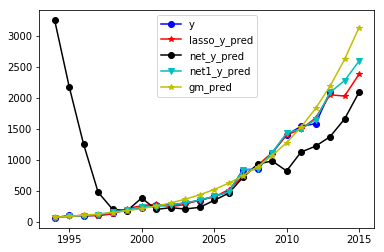

In [179]:
data[['y','lasso_y_pred','net_y_pred','net1_y_pred','gm_pred']].plot(style=['b-o','r-*','k-o','c-v','y-*'])#发现拟合效果很差，主要原因在于特征变量的选择有问题
plt.show()#整体来看lasso和采用书上自变量的神经网络预测较为合适